# **Tokopedia Mobile App Reviews Sentiment Analysis & Topic Modeling**

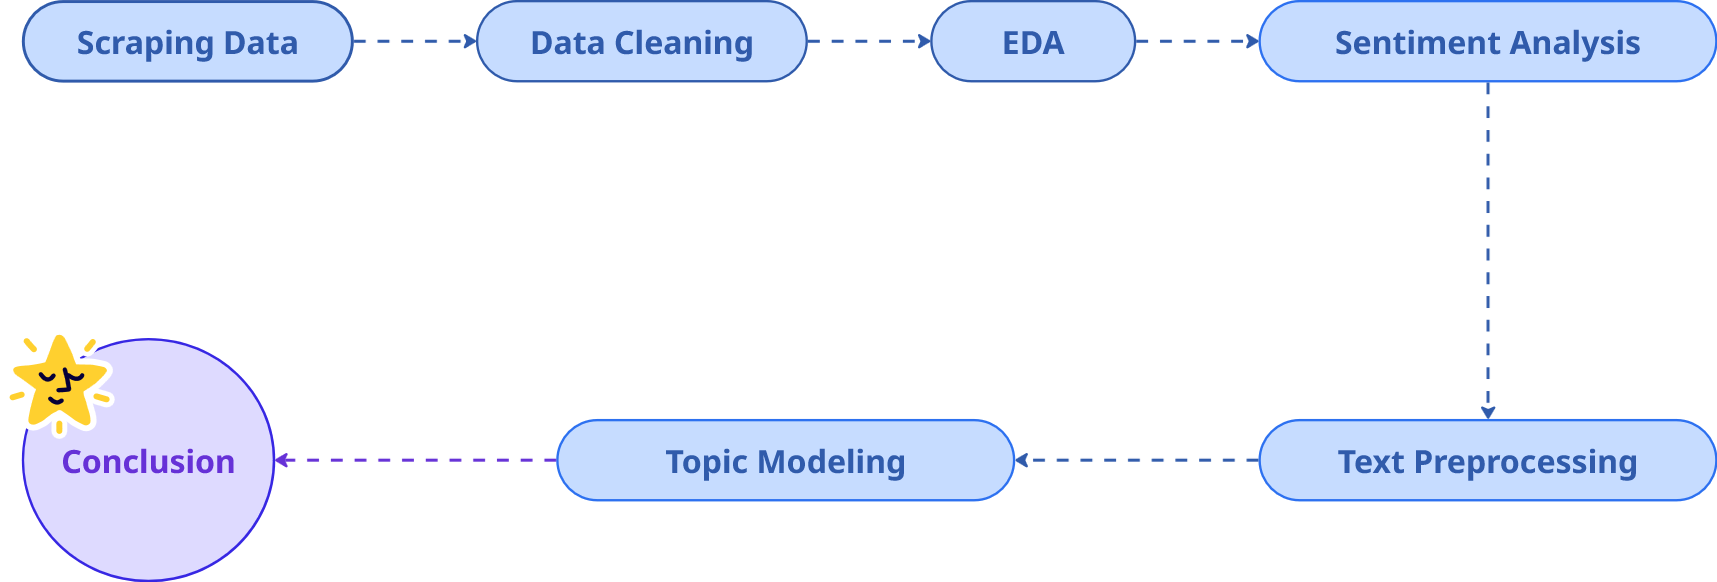

## Objective

- Identify the main themes from Tokopedia user reviews using topic modeling.

- Interpret and group topics into more understandable categories.

- Analyze the distribution of negative topics to determine users primary complaints.

- Explore positive reviews to understand the aspects most appreciated by users.

- Provide insights regarding priority areas for improvement and strengths that should be maintained.

## Outline

- Scraping Data : Collecting data from google play store website
- Data Cleaning : Fixing messy data like removing duplicates, handling missing values, or correcting errors.
- EDA : Taking a first look at the data with charts and stats to understand patterns and problems.
- Sentiment Analysis : Finding out if people’s opinions in the text are positive, negative, or neutral.
- Text Preprocessing : Preparing text for analysis, such as tokenizing words, normalizing, or scaling values.
- Topic Modeling : Discovering the main themes or topics that appear in a large collection of text.
- Conclusion : Summarizing the findings and insights from all the steps to answer the main question.

---

# 🚨 Install & Import Library

## Install Library

In [18]:
#google play scraper : Used to collect app data and user reviews directly from Google Play Store.
!pip install google-play-scraper

In [19]:
# Creates visual word clouds to highlight the most frequent words in text data.
!pip install wordcloud
# Adds a simple progress bar to loops, so you can see how long a process takes.
!pip install tqdm
# A toolkit for natural language processing, like tokenizing, stemming, or removing stopwords.
!pip install nltk
# Provides powerful pre-trained models for tasks such as text classification, sentiment analysis, and translation.
!pip install transformers

In [20]:
# to discover and understand hidden topics in documents or user reviews without manually reading them one by one
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 4.5 MB/s eta 0:00:00


## Import Library

In [21]:
# Import library for play store reviews scraping
from google_play_scraper import Sort, reviews
import pandas as pd

In [22]:
# Import library for visualize data
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Import library for teks processing & model inference
import re
import string
from tqdm import tqdm
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import pipeline
tqdm.pandas()
import asyncio
import time
import transformers
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [24]:
# Import library for topic modeling
from bertopic import BERTopic
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.representation import MaximalMarginalRelevance
from umap import UMAP

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


---

# 🗃️ Scraping Data

Scrape user reviews of the Tokopedia application from the Google Play Store and save the scraped data into a CSV file.

In [ ]:
result = reviews(
    'com.tokopedia.tkpd', # Id Tokopedia mobile app in play store
    lang='id', # languege code reviews
    country='id', # country code reviews
    sort=Sort.MOST_RELEVANT, # filtering method reviews
    count=100000 # count of data reviews
)

In [ ]:
result = pd.DataFrame(result[0]) # Convert data scraping into table dataframe
result.info() # To show feature, count & type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              100000 non-null  object        
 1   userName              100000 non-null  object        
 2   userImage             100000 non-null  object        
 3   content               100000 non-null  object        
 4   score                 100000 non-null  int64         
 5   thumbsUpCount         100000 non-null  int64         
 6   reviewCreatedVersion  69649 non-null   object        
 7   at                    100000 non-null  datetime64[ns]
 8   replyContent          48817 non-null   object        
 9   repliedAt             48817 non-null   datetime64[ns]
 10  appVersion            69649 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 8.4+ MB


- The number of data rows varies between 4,000 and 100,000, which means there are some empty rows.

- The data has around 11 columns/features, but based on the column names, some columns will be removed because they don’t contain meaningful values.


In [ ]:
result.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,91ae7188-99cd-4ac0-8ce3-fc01cc7b371b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong ditindak dan bila perlu dibanned tutup ...,2,9,3.327.0,2025-08-30 10:55:50,None,NaT,3.327.0
1,b3d61473-6ac2-4897-a583-6de199e21b51,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tokopedia cuma pas awal pesan barang aja yg on...,1,15,3.327.0,2025-08-29 14:10:47,None,NaT,3.327.0
2,e3ad9554-2391-48bf-9510-4f0163064002,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Udah hampir bagus sih, tapi ada masalah dari e...",2,0,3.326.0,2025-08-31 07:18:47,"Halo Toppers, terima kasih atas rating yang ka...",2024-08-18 22:00:24,3.326.0
3,66307246-82d2-4f3d-8ef7-8825071ad7c5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"banyak penipunya, uang pembayaran saya tertaha...",1,53,3.326.0,2025-08-26 13:01:54,None,NaT,3.326.0
4,77c6c053-8716-4584-b4d5-10db294e36d8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya sarankan tidak usah pakai tokped. aplikas...,1,20,3.327.0,2025-08-29 15:11:10,None,NaT,3.327.0


- reviewId: Unique ID for each review.
- userName: Name of the user who wrote the review.
- userImage: URL or link to the user’s profile picture.
- content: The text of the review written by the user.
- score: Rating given by the user.
- thumbsUpCount: Number of likes on the review.
- reviewCreatedVersion: App version when the review was created.
- at: Date and time when the review was published.
- replyContent: Developer’s reply to the review.
- repliedAt: Date and time when the reply was given.
- appVersion: App version when the review data was collected or last known.

In [ ]:
data = result.to_csv('result.csv', index=False) # Save dataframe as csv file

---

# 🧼 Data Cleaning

This step is about cleaning the raw scraped data to make it ready for the next stages, such as handling duplicates, missing values, or incorrect data types.

## Delete Missing & Duplicate Rows

In [2]:
# Load csv file
data = pd.read_csv('result.csv')
# Remove feature not have insight
data = data.drop(['reviewId','userName', 'userImage', 'reviewCreatedVersion', 'replyContent', 'repliedAt'],axis=1)

- The data was saved in CSV format, then loaded and stored in a variable called data.
- Some columns that don’t contain meaningful values were removed to simplify the dataset, including 'reviewId', 'userName', 'userImage', 'reviewCreatedVersion', 'replyContent', and 'repliedAt'.

In [3]:
data = data.drop_duplicates() # remove duplicated rows
data = data.dropna() # remove missing rows

data.info() # show results

<class 'pandas.core.frame.DataFrame'>
Index: 69649 entries, 0 to 99998
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        69649 non-null  object
 1   score          69649 non-null  int64 
 2   thumbsUpCount  69649 non-null  int64 
 3   at             69649 non-null  object
 4   appVersion     69649 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.2+ MB


In [4]:
data.head(1)

,content,score,thumbsUpCount,at,appVersion
0,Tolong ditindak dan bila perlu dibanned tutup ...,2,9,2025-08-30 10:55:50,3.327.0


- The number of rows in each column/feature is now consistent, with 69.649 rows, meaning there are no more missing or duplicate data.
- The at column shows the date and time when a review was posted by a user, but since only the review month in 2025 is needed, filtering will be applied.
- The appVersion column shows the application version, but the version values are too complex, so simplification is needed to make the analysis easier.

## Data Transformation

### Month

In [5]:
data['at'] = pd.to_datetime(data['at']) # Convert feature at type to datetime type
data = data[data['at'].dt.year == 2025] # Extract data only in 2025

data['month'] = data['at'].dt.month.astype('str') # Extract mont feature & make it string type
data = data[data['month'].isin(['6', '7', '8'])] # Filtering data in motnh 6, 7 & 8
data = data.drop(columns=['at'], axis=1) # Deleted at feature
data['month'].unique()

array(['8', '7', '6'], dtype=object)

- Since only data from the year 2025 is needed, the dataset was filtered to include only that year.
- Then, because the focus is on data from June, July, and August (months 6, 7, and 8), additional filtering was applied.

### App Version

In [6]:
print(data['appVersion'].unique()) # Check app version unique value

['3.327.0' '3.326.0' '3.325.0' '3.323.0' '3.319.0' '3.316.1' '3.320.0'
 '3.324.0' '3.322.0' '3.318.0' '3.317.0' '3.321.0' '3.316.0' '3.322.1'
 '3.315.0' '3.314.0' '3.310.0' '3.312.0' '3.309.0' '3.303.0' '3.306.0'
 '3.313.0' '3.305.0' '3.304.0' '3.311.0' '3.219' '4.01-test' '3.119'
 '3.260' '3.260.1' '2.26.1' '3.164' '3.218' '3.116' '3.163' '3.294.1'
 '2.1.3' '3.166' '3.243' '3.200.1' '3.220' '3.247.1' '3.279.0' '2.5.1'
 '3.41' '2.20.3' '3.283.0' '3.134' '3.268.0' '3.256' '3.214' '3.301.1'
 '3.277.0' '3.292.0' '3.196' '3.295.0' '3.157' '3.148' '3.114' '3.137'
 '3.147.1' '3.273.2' '3.302.0' '3.298.0' '3.192' '3.165' '3.264' '3.12'
 '3.72' '3.175' '3.172' '3.193' '3.284.0' '3.181' '3.156' '3.108' '3.251'
 '3.53.1' '3.179' '3.106' '3.222' '3.225' '3.274.0' '3.201' '3.266'
 '3.155' '3.265' '3.281.0' '3.289.0' '3.135' '3.215' '3.238.1' '3.249'
 '3.230' '3.269.0' '3.126.1' '3.136' '3.263' '3.197' '3.141' '3.260.2'
 '3.170' '3.160.1' '3.288.0' '3.293.1' '3.234' '3.90' '3.240.1' '3.202'
 '3.226

In [7]:
data['minorVersion'] = data['appVersion'] # Change feature appVersion name to minorVersion
data = data.drop(columns=['appVersion'], axis=1) # Deleted appVersion feature
data['majorVersion'] = data['minorVersion'].str[:3] # Round minorVersion value & save to majorVersion feature
print(data['majorVersion'].unique()) # To show unique value of majorVersion

['3.3' '3.2' '4.0' '3.1' '2.2' '2.1' '2.5' '3.4' '3.7' '3.5' '3.9' '3.6'
 '3.8']


- Previously, the number of app versions used by users was very large, meaning the app versions were highly varied.
- To simplify, only the main versions were taken, resulting in 13 primary app versions used by the users.

---

# 🔎 Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the initial step used to find insights in the data, such as patterns, anomalies/outliers, data distribution, and more.

## Data Deskriptif

In [ ]:
data.describe() # To show statistcs summary from data

,score,thumbsUpCount
count,3874.000000,3874.000000
mean,2.431853,6.567888
std,1.709960,66.083616
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,5.000000,2.000000
max,5.000000,3457.000000


- The average score is 2.4, which is quite low on a scale of 1–5. This means most users are not satisfied with the Tokopedia app.
- The standard deviation is 1.6, showing that the ratings/scores vary quite a lot.
- The maximum number of likes is 3,457, meaning there is a review that received a lot of attention from other users, likely because the review was relatable to them.

## Score

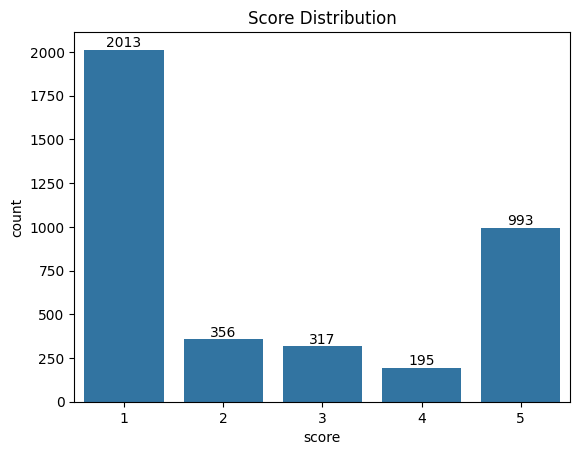

In [9]:
ax = sns.countplot(data=data, x='score') # To show score distribution
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Score Distribution')
plt.show()

- The distribution of scores/ratings in the data looks very unbalanced or extreme.
- Score 1 is the most dominant, giving the insight that most user reviews are negative or show dissatisfaction.
- However, Score 5 also has a considerable number, although not as many as Score 1. This shows that, on the other hand, many users are also satisfied with the Tokopedia app.
- The remaining scores (2, 3, and 4) are very few, meaning only a small number of users felt neutral about the app.
- From these results, it can be concluded that user satisfaction is very polarized — either mostly negative or highly positive.

## Major Version

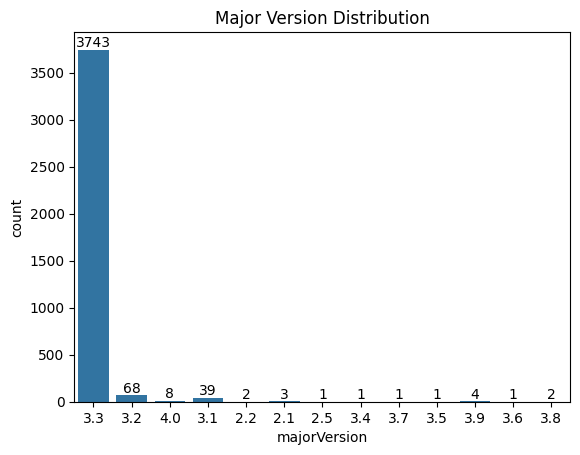

In [11]:
ax=sns.countplot(data=data, x='majorVersion') # To show major version app distribution
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Major Version Distribution')
plt.show()

- We can see that the distribution of Tokopedia app versions is very different for each version, with version 3.3 being the one used by most users.
- Other versions have very few users, meaning they were rarely used between June, July, and August 2025.

## Score VS Thumbs Up Count

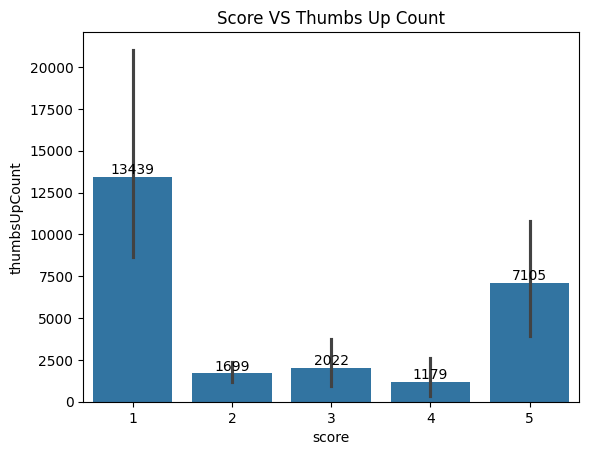

In [13]:
# To show distribution thumbs up count per score.
ax = sns.barplot(data=data, x='score', y='thumbsUpCount', estimator="sum")
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Score VS Thumbs Up Count')
plt.show()

- It turns out that the distribution of likes for each score is very different.
- Score 1 has the highest number of likes compared to other scores, meaning negative issues or dissatisfaction received a lot of attention and support from users.
- However, Score 5 also has many likes, showing that many users also felt satisfied with the Tokopedia app.
- As before, the number of likes for Scores 2, 3, and 4 is relatively small.

## Major Version VS Score

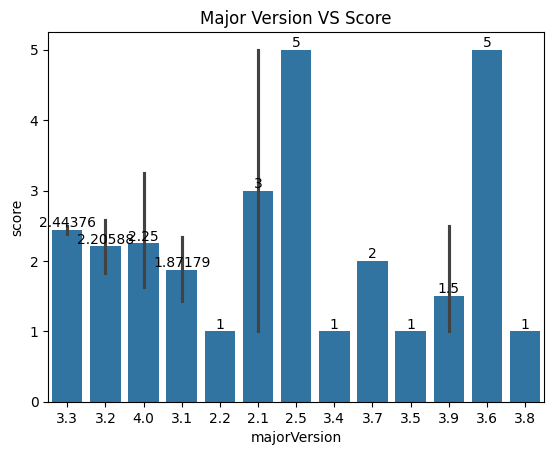

In [14]:
# To show mean score per category major version
ax = sns.barplot(data=data, x='majorVersion', y='score')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Major Version VS Score')
plt.show()

App version 3.3, which has the most users, actually has a very low average score. This means that most users gave negative reviews.

---

# 🤬 Sentiment Analysis

Sentiment analysis is a method used to analyze user reviews in order to understand user satisfaction with the Tokopedia app. It works by classifying user emotions into sentiment labels: NEGATIVE and POSITIVE. In this case, the score feature is used to determine the sentiment: scores 1, 2, and 3 are labeled as Negative, while scores 4 and 5 are labeled as Positive.

In [15]:
def sentiment(score):
    if score in [1,2,3]:
        return "NEGATIVE"
    else:
        return "POSITIVE"

In [25]:
data['labels'] = data["score"].progress_apply(sentiment) # Save sentiment labels in labels feature on data dataframe
data.head()

100%|██████████| 3874/3874 [00:00<00:00, 1080296.10it/s]


,content,score,thumbsUpCount,month,minorVersion,majorVersion,labels
0,Tolong ditindak dan bila perlu dibanned tutup ...,2,9,8,3.327.0,3.3,NEGATIVE
1,Tokopedia cuma pas awal pesan barang aja yg on...,1,15,8,3.327.0,3.3,NEGATIVE
2,"Udah hampir bagus sih, tapi ada masalah dari e...",2,0,8,3.326.0,3.3,NEGATIVE
3,"banyak penipunya, uang pembayaran saya tertaha...",1,53,8,3.326.0,3.3,NEGATIVE
4,saya sarankan tidak usah pakai tokped. aplikas...,1,20,8,3.327.0,3.3,NEGATIVE


## EDA Sentiment Labels

### Sentiment Distribution

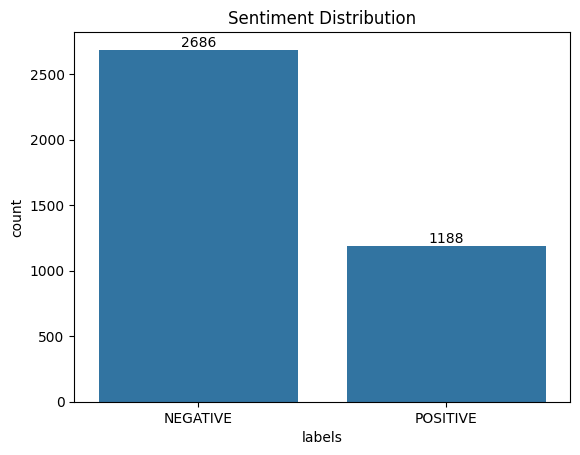

In [27]:
# To show sentiment labels distributions
ax = sns.countplot(data=data, x='labels')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Sentiment Distribution')
plt.show()

As noted earlier, the most dominant score is 1, which shows that most user reviews of the Tokopedia app carry a negative sentiment.

### Sentiment VS Thumbs Up Count

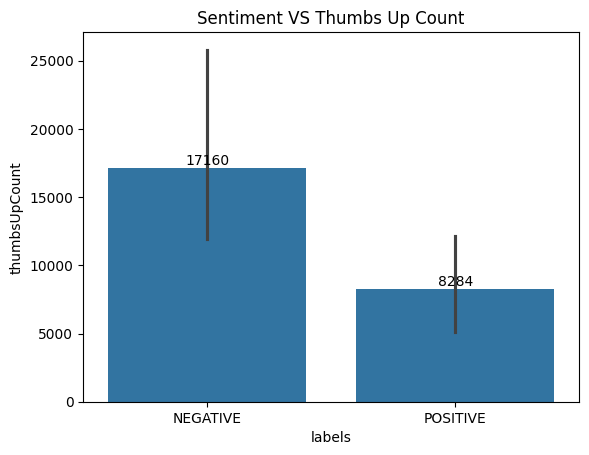

In [28]:
# To see count total of thumbs up count per labels
ax=sns.barplot(data=data, x="labels", y="thumbsUpCount", estimator="sum")
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Sentiment VS Thumbs Up Count')
plt.show()

In addition, the number of likes on negative sentiment reviews is higher than on positive sentiment reviews. This means many users paid more attention to or supported negative issues, likely because they were related to their own experiences.

### Sentiment VS Month

<Axes: xlabel='month', ylabel='count'>

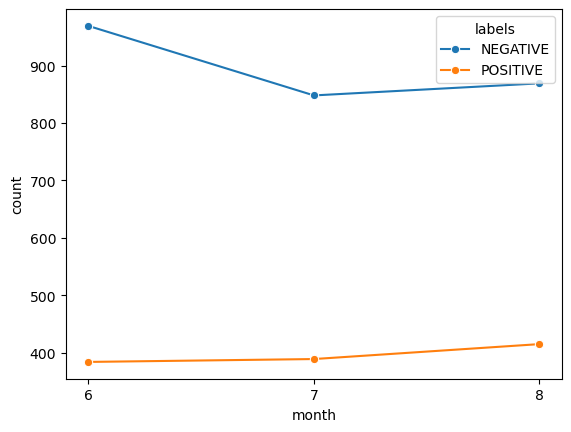

In [ ]:
# To show labels distributions per month in 2025
plot_data = data.groupby(["month", "labels"]).size().reset_index(name="count")
sns.lineplot(data=plot_data, x="month", y="count", hue="labels", marker="o")

From June to August, user reviews consistently showed negative sentiment. This means that during this period, most users were dissatisfied with the Tokopedia app, and no significant improvement in user satisfaction was observed.

### Sentiment VS Major Version

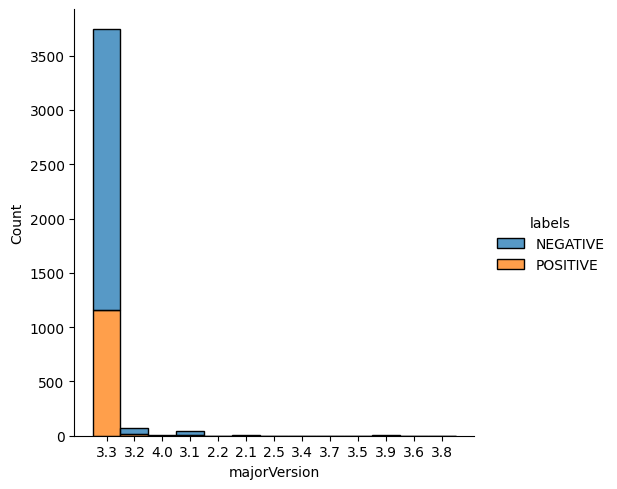

In [30]:
# To see count total of major version per labels
sns.displot(data=data, x="majorVersion", hue='labels', multiple='stack')

Version 3.3, which is the majority version used by users, has a very high negative sentiment. This means that version 3.3 contains many negative issues that need to be fixed immediately.

---

# 📜 Text Preprocessing

Text preprocessing is the step done before topic modeling. In this stage, text data is prepared properly so that the topic modeling process can produce the expected results. Some tasks in this step include removing numbers, punctuation, emojis, and other unnecessary symbols.

In [ ]:
# Collect and filtering data from content feature and make it a new dataframe
docs = pd.DataFrame(data['content'].reset_index(drop=True), columns=['content'])

### Document Translated Model

One of the first steps before text preprocessing is translating the text data from Indonesian into English. The main reason is to make the data easier to process and to produce better outputs.

In addition, translating Indonesian text into English before preprocessing helps take advantage of more complete NLP models and resources, standardizes vocabulary, reduces ambiguity, and makes cross-language analysis easier, leading to more accurate results.

In [ ]:
translator = pipeline(
    "translation", #pipeline model type
    model="facebook/nllb-200-distilled-600M", # name of model for translation
    src_lang="ind_Latn", # id/ code first language
    tgt_lang="eng_Latn" # id/ code output language
)

Device set to use cuda:0


In [ ]:
# Function for translation teks in docs
def translate(text):
  return translator(text)[0]["translation_text"]

In [ ]:
# Apply function translation in data content feature
docs['text_translate'] = docs['content'].progress_apply(translate)

  0% 11/3874 [00:04<20:10,  3.19it/s]You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
 50% 1942/3874 [06:38<03:22,  9.56it/s]Your input_length: 226 is bigger than 0.9 * max_length: 200. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
 55% 2118/3874 [07:02<03:37,  8.06it/s]Your input_length: 215 is bigger than 0.9 * max_length: 200. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
 60% 2328/3874 [07:29<02:21, 10.94it/s]Your input_length: 181 is bigger than 0.9 * max_length: 200. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
 89% 3449/3874 [09:18<00:25, 16.36it/s]Your input_length: 232 is bigger than 0.9 * max_length: 200. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
100% 3874/3874 [09:52<00:00,  6.53it/s]


### Documen/ Text Cleanning

In [ ]:
# Download NLTK resources if not already available
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# 1. Remove numbers, symbols, emojis, links, mentions, etc.
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)       # remove mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)       # remove hashtags
    text = re.sub(r'RT[\s]+', '', text)              # remove retweets "RT"
    text = re.sub(r"http\S+", '', text)              # remove URLs
    text = re.sub(r'[0-9]+', '', text)               # remove numbers
    text = re.sub(r'[^\w\s]', '', text)              # remove symbols/emoji
    text = text.replace('\n', ' ')                   # remove newlines
    text = text.strip()
    return text

# 2. Lowercasing
def casefoldingText(text):
    return text.lower()

# 3. Tokenization
def tokenizing(text):
    return word_tokenize(text)

# 4. Remove stopwords
def stopwordstext(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# 5. Lemmatization
def lemmatizing(tokens):
    lemmatizer = WordNetLemmatizer()
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(processed_tokens)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Apply all function of text preprocessing
docs['text_clean'] = docs['text_translate'].progress_apply(cleaningText)
docs['text_lower'] = docs['text_clean'].progress_apply(casefoldingText)
docs['text_tokenizing'] = docs['text_lower'].progress_apply(tokenizing)
docs['text_stopwords'] = docs['text_tokenizing'].progress_apply(stopwordstext)
docs['text_akhir'] = docs['text_stopwords'].progress_apply(lemmatizing)

100% 3874/3874 [00:00<00:00, 113774.70it/s]
100% 3874/3874 [00:00<00:00, 3089112.87it/s]
100% 3874/3874 [00:00<00:00, 39826.60it/s]
100% 3874/3874 [00:00<00:00, 47789.97it/s]
100% 3874/3874 [00:01<00:00, 3676.95it/s]


In [ ]:
docs.head()

,content,text_translate,text_clean,text_lower,text_tokenizing,text_stopwords,text_akhir
0,Tolong ditindak dan bila perlu dibanned tutup ...,Please act and if necessary permanently shut d...,Please act and if necessary permanently shut d...,please act and if necessary permanently shut d...,"[please, act, and, if, necessary, permanently,...","[please, act, necessary, permanently, shut, se...",please act necessary permanently shut seller u...
1,Tokopedia cuma pas awal pesan barang aja yg on...,"It's just that at the beginning of the order, ...",Its just that at the beginning of the order th...,its just that at the beginning of the order th...,"[its, just, that, at, the, beginning, of, the,...","[beginning, order, fare, cheap, second, time, ...",beginning order fare cheap second time fare hi...
2,"Udah hampir bagus sih, tapi ada masalah dari e...","It's almost fine, but there's a problem with t...",Its almost fine but theres a problem with the ...,its almost fine but theres a problem with the ...,"[its, almost, fine, but, theres, a, problem, w...","[almost, fine, theres, problem, expedition, st...",almost fine there problem expedition still wor...
3,"banyak penipunya, uang pembayaran saya tertaha...","Many of the scammers, my payment money is stuc...",Many of the scammers my payment money is stuck...,many of the scammers my payment money is stuck...,"[many, of, the, scammers, my, payment, money, ...","[many, scammers, payment, money, stuck, tokped...",many scammer payment money stuck tokped report...
4,saya sarankan tidak usah pakai tokped. aplikas...,I suggest you don't use a topped-up app. It's ...,I suggest you dont use a toppedup app Its a re...,i suggest you dont use a toppedup app its a re...,"[i, suggest, you, dont, use, a, toppedup, app,...","[suggest, dont, use, toppedup, app, really, ba...",suggest dont use toppedup app really bad app d...


In [ ]:
docs = docs["text_akhir"].reset_index(drop=True)
data = data.reset_index(drop=True)

docs = pd.concat([data,docs], axis=1)
docs.head()

,content,score,thumbsUpCount,month,minorVersion,majorVersion,labels,text_akhir
0,Tolong ditindak dan bila perlu dibanned tutup ...,2,9,8,3.327.0,3.3,NEGATIVE,please act necessary permanently shut seller u...
1,Tokopedia cuma pas awal pesan barang aja yg on...,1,15,8,3.327.0,3.3,NEGATIVE,beginning order fare cheap second time fare hi...
2,"Udah hampir bagus sih, tapi ada masalah dari e...",2,0,8,3.326.0,3.3,NEGATIVE,almost fine there problem expedition still wor...
3,"banyak penipunya, uang pembayaran saya tertaha...",1,53,8,3.326.0,3.3,NEGATIVE,many scammer payment money stuck tokped report...
4,saya sarankan tidak usah pakai tokped. aplikas...,1,20,8,3.327.0,3.3,NEGATIVE,suggest dont use toppedup app really bad app d...


---

# 💭 Topic Modeling

Topic modeling is done when the text data is already considered fully clean. It is carried out using BERT, a framework for contextual representation that groups documents based on topics. BERT produces more accurate topics compared to classical methods because it understands the meaning of words within the context of sentences.

## Data/ Document Splitting

Before doing topic modeling, the text data is split based on sentiment labels into negative data and positive data. The purpose of this step is to make it easier to interpret the resulting topics.

In [ ]:
# Splitting data into two different dataframe such as negative & positive
negative = docs[docs['labels']=='NEGATIVE']['text_akhir']
positive = docs[docs['labels']=='POSITIVE']['text_akhir']

## Topic Modeling Model

In topic modeling, there are several parameters that need to be considered, including:

- embedding_model: Converts text into numerical vectors that represent word meaning.
- umap_model: Reduces vector dimensions to make clustering easier.
- hdbscan_model = KMeans(n_clusters=n_cluster): Groups documents into n_cluster topics (using KMeans instead of HDBSCAN).
- vectorizer_model: Converts text into tokens for analysis.
- ctfidf_model: Calculates topic representation using C-TF-IDF.
- representation_model: Combines embeddings and tokenization to generate the final topics.

In [ ]:
# Load embedding model: converts text into semantic vectors
embedding_model = pipeline(
    "feature-extraction",
    model="princeton-nlp/sup-simcse-roberta-large"
)
# "sup-simcse-roberta-large" is a RoBERTa-based model fine-tuned for semantic similarity

# Dimensionality reduction model (UMAP)
umap_model = UMAP(
    n_neighbors=15, # consider 15 nearest neighbors to preserve local structure
    n_components=5, # reduce embeddings to 5 dimensions
    min_dist=0.0, # allows points to be packed more closely
    metric='cosine', # measure distance based on cosine similarity
    random_state=42
)

# Vectorizer: converts text into token counts
vectorizer_model = CountVectorizer(
    min_df=10, # only keep words/phrases that appear at least 10 times
    stop_words="english"
)

# Class-based TF-IDF transformer
ctfidf_model = ClassTfidfTransformer(bm25_weighting=True)
# - Uses BM25 weighting for more accurate class-based keyword extraction

# Keyword representation model using Maximal Marginal Relevance (MMR)
representation_model = MaximalMarginalRelevance(diversity=0.3)
# - diversity=0.3: balance between relevance and diversity of selected keywords

def topic(n_cluster):
    # Function to create a BERTopic model with a fixed number of clusters
    topic_model = BERTopic(
        embedding_model=embedding_model,           # text embeddings
        umap_model=umap_model,                     # dimensionality reduction
        hdbscan_model=KMeans(n_clusters=n_cluster),
        # use Agglomerative Clustering instead of default HDBSCAN
        # number of clusters defined by n_cluster

        vectorizer_model=vectorizer_model,         # text to tokens
        ctfidf_model=ctfidf_model,                 # topic representation with C-TF-IDF
        representation_model=representation_model, # keyword extraction with MMR
        calculate_probabilities=True,              # compute topic probabilities per document
        verbose=True                               # show training logs
    )
    return topic_model

config.json:   0%|          | 0.00/664 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


## Negative Topic

### Topic Modelling

In [ ]:
negative_topic = topic(25) # Output 25 topics
negative_info = negative_topic.fit_transform(negative) # Inference with negative data
negative_info = negative_topic.get_topic_info() # Get topic info result
negative_info.to_excel('tokped_negative.xlsx') # Save topic result
negative_info # To show topic result

2025-09-02 14:18:26,027 - BERTopic - Embedding - Transforming documents to embeddings.
100% 2686/2686 [00:10<00:00, 244.68it/s]
2025-09-02 14:18:37,010 - BERTopic - Embedding - Completed ✓
2025-09-02 14:18:37,010 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-09-02 14:18:44,795 - BERTopic - Dimensionality - Completed ✓
2025-09-02 14:18:44,796 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-09-02 14:18:44,813 - BERTopic - Cluster - Completed ✓
2025-09-02 14:18:44,814 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-09-02 14:18:47,471 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,0,176,0_courier_package_shipping_delivery,"[courier, package, shipping, delivery, service...",[time go junk dont get order courier im past e...
1,1,175,1_app_updated_phone_apps,"[app, updated, phone, apps, apk, error, applic...","[update cant open app, every open topped month..."
2,2,153,2_customer_complaint_refund_returned,"[customer, complaint, refund, returned, order,...",[handling order returned seller telepathic cou...
3,3,152,3_worse_old_bit_complicated,"[worse, old, bit, complicated, trouble, bug, c...","[getting worse son bitch, little bit dead end ..."
4,4,136,4_long_package_delivery_week,"[long, package, delivery, week, process, shipp...",[long delivery process cake two three day week...
5,5,133,5_search_product_feature_apk,"[search, product, feature, apk, difficult, fix...",[please correct search type name product alway...
6,6,131,6_gopay_payment_pay_money,"[gopay, payment, pay, money, transaction, payl...",[could done five payment transaction payment b...
7,7,130,7_voucher_discount_price_checkout,"[voucher, discount, price, checkout, scam, cha...","[used lot voucher discount lot money, there di..."
8,8,125,8_cancellation_order_wait_process,"[cancellation, order, wait, process, refund, r...",[ive tokopedia customer long time lot packer s...
9,9,119,9_tiktok_tokopedia_user_problem,"[tiktok, tokopedia, user, problem, tokopedias,...",[remember first time tokopedia user still covi...


After the negative topic modeling was done, a dataframe was generated containing several features, including:
- Topic: Identification number of the topic.
- Count: Number of documents included in this topic.
- Name: Automatically generated topic name.
- Representation: Keywords that appear most often in this topic, e.g., [courier, package].
- Representative_Docs: Example sentences or documents most relevant to the topic.

### Sub Topic Intepretation

In [ ]:
negative_topic.set_topic_labels({
    0: "Courier delay beyond estimated delivery date",
    1: "App won’t open after forced update",
    2: "Refund delayed after seller return confirmed",
    3: "Frustrated users spamming meaningless text",
    4: "Refund and delivery waiting too long",
    5: "Search feature fails to find products",
    6: "Gopay payment errors block transactions",
    7: "Lack of usable discount vouchers",
    8: "Automatic cancellation wastes buyer’s time",
    9: "UI/UX worsened after TikTok acquisition",
    10: "Seller quota subscription harms convenience",
    11: "Accusations of cheating and app shutdown",
    12: "Prices higher than other platforms",
    13: "Annoying repetitive seller promotions",
    14: "Fraudulent transactions and missing balances",
    15: "Frequent bugs and slow server errors",
    16: "Returns denied despite damaged goods",
    17: "Too many scammers, refunds not guaranteed",
    18: "Customer service ignores buyer complaints",
    19: "Phone number update consistently fails",
    20: "Expedition service unreliable and slow",
    21: "Customer service chat ends without solution",
    22: "Refund stuck, balance withdrawal impossible",
    23: "Prices considered expensive by users",
    24: "Free rent vouchers missing or fake"
})

negative_info = negative_topic.get_document_info(negative)
negative_info["Sub Topic"] = negative_info["CustomName"]
negative_info = negative_info[["Document","Topic", "Sub Topic"]]
negative_info.head()

,Document,Topic,Sub Topic
0,please act necessary permanently shut seller u...,2,Refund delayed after seller return confirmed
1,beginning order fare cheap second time fare hi...,0,Courier delay beyond estimated delivery date
2,almost fine there problem expedition still wor...,0,Courier delay beyond estimated delivery date
3,many scammer payment money stuck tokped report...,14,Fraudulent transactions and missing balances
4,suggest dont use toppedup app really bad app d...,11,Accusations of cheating and app shutdown


- The results of topic modeling produced 25 topics from thousands of user reviews. This is quite a large number, so simplification was done by grouping them into subtopics.

- In addition, the subtopic names were created manually by observing the patterns shown in the representation feature. The interpretation can be seen at the following link: [intepretation link](https://docs.google.com/spreadsheets/d/1wNKjavHnZsuwFc-QIRp4nDNXrUUtlWa71IjYqfjWwtU/edit?usp=sharing)

### Topic Sanitizing/ Clusterring

- After interpretation, the automatically generated topics can now be read and understood more easily thanks to the manual interpretation process.

- However, the number of interpreted topics reached 25, which is quite a lot to describe user review conditions. The solution is to perform clustering or grouping of topics, resulting in 6 main topics: Logistics & Shipping Problems, Refunds, Returns & Disputes, App Functionality & System Errors, Pricing, Vouchers & Promotions, Account Access & Transaction Security, Support Service & Policy Issues.


In [ ]:
def get_topic_group(topic_number):
    if topic_number in [0, 4, 20]:
        return "Logistics & Shipping Problems"
    elif topic_number in [2, 16, 17, 22]:
        return "Refunds, Returns & Disputes"
    elif topic_number in [1, 3, 9, 15, 11]:
        return "App Functionality & System Errors"
    elif topic_number in [7, 12, 13, 23, 24]:
        return "Pricing, Vouchers & Promotions"
    elif topic_number in [6, 8, 14, 18, 19]:
        return "Account Access & Transaction Security"
    else:  # [5, 10, 21]
        return "Support Service & Policy Issues"

negative_info["Main Topic"] = negative_info["Topic"].progress_apply(get_topic_group)
negative_info = negative_info[["Document","Main Topic", "Sub Topic"]]

negative = data[data['labels']=='NEGATIVE'][["thumbsUpCount","month", "minorVersion","majorVersion"]]
negative_info = pd.concat([negative_info.reset_index(drop=True), negative.reset_index(drop=True)], axis=1)
negative_info

100% 2686/2686 [00:00<00:00, 632134.47it/s]


,Document,Main Topic,Sub Topic,thumbsUpCount,month,minorVersion,majorVersion
0,please act necessary permanently shut seller u...,"Refunds, Returns & Disputes",Refund delayed after seller return confirmed,9,8,3.327.0,3.3
1,beginning order fare cheap second time fare hi...,Logistics & Shipping Problems,Courier delay beyond estimated delivery date,15,8,3.327.0,3.3
2,almost fine there problem expedition still wor...,Logistics & Shipping Problems,Courier delay beyond estimated delivery date,0,8,3.326.0,3.3
3,many scammer payment money stuck tokped report...,Account Access & Transaction Security,Fraudulent transactions and missing balances,53,8,3.326.0,3.3
4,suggest dont use toppedup app really bad app d...,App Functionality & System Errors,Accusations of cheating and app shutdown,20,8,3.327.0,3.3
...,...,...,...,...,...,...,...
2681,tokopedia hr sprite store send old stock publi...,"Pricing, Vouchers & Promotions",Prices higher than other platforms,0,6,3.318.0,3.3
2682,tokopedia care good,"Pricing, Vouchers & Promotions",Prices higher than other platforms,1,8,3.324.0,3.3
2683,since merger tiktoks application become heavy,App Functionality & System Errors,Frustrated users spamming meaningless text,0,7,3.322.0,3.3
2684,freezer discounted freezer complicated paylater,Account Access & Transaction Security,Gopay payment errors block transactions,0,8,3.326.0,3.3


### EDA (Topic)

#### Main Topic

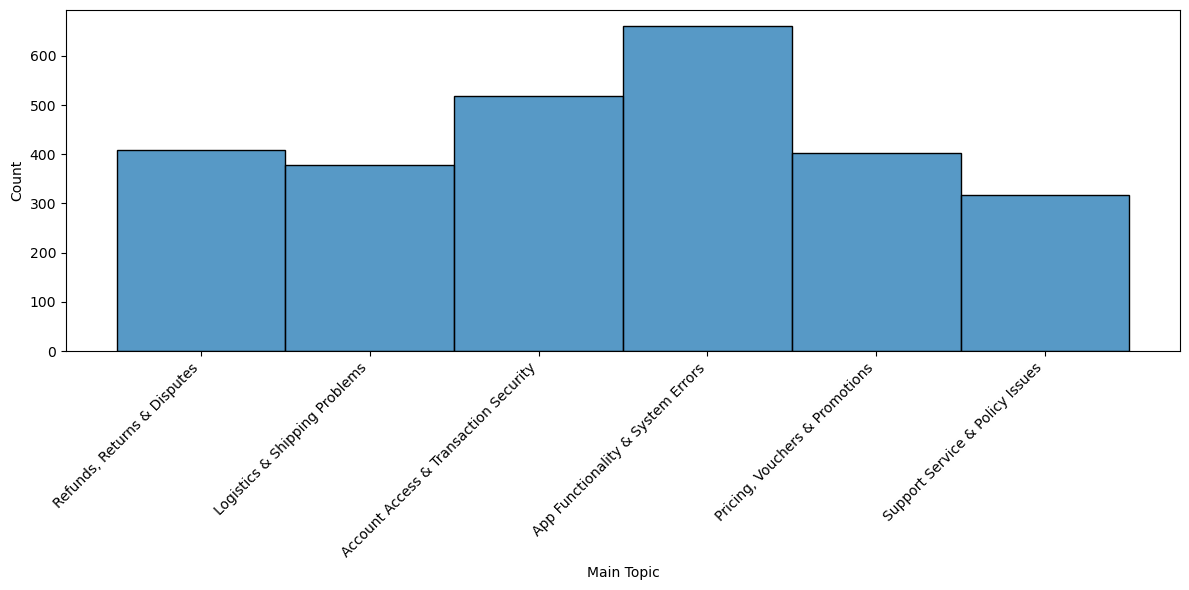

In [ ]:

plt.figure(figsize=(12, 6))
sns.histplot(data=negative_info, x="Main Topic")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

The distribution of user reviews reveals six main topics. The majority of complaints are related to App Functionality & System Errors and Account Access & Transaction Security, indicating that technical and security issues are the primary concerns. Refunds, Returns & Disputes as well as Pricing, Vouchers & Promotions appear at a moderate level, while Logistics & Shipping Problems and Support Service & Policy Issues are relatively lower yet remain significant.

#### Main Topic VS Thumb Up Count

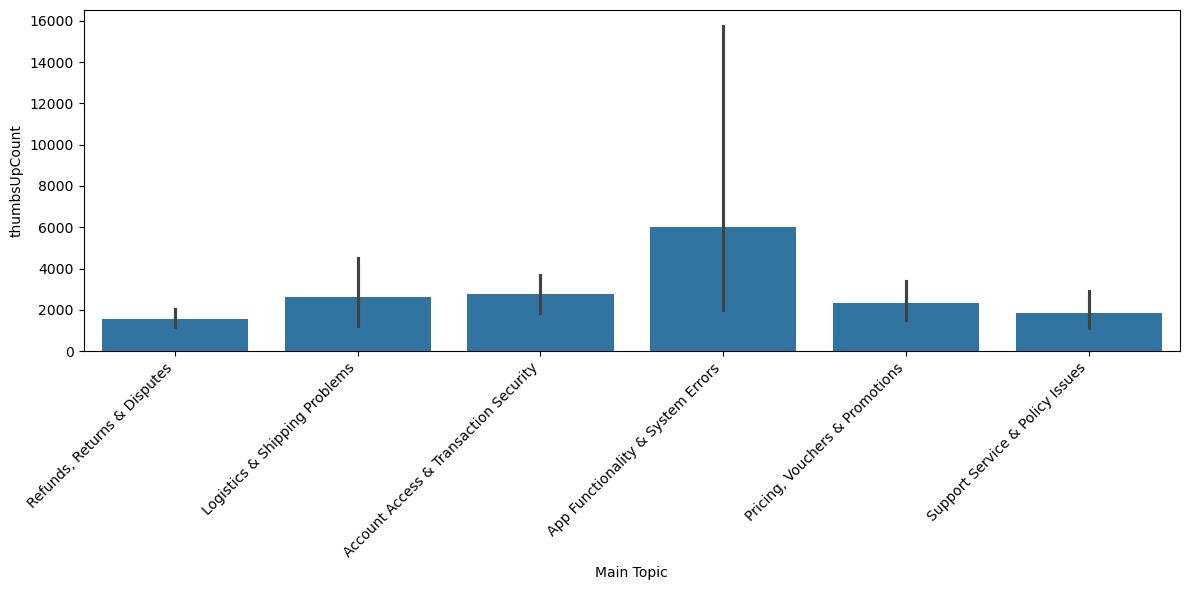

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=negative_info, x="Main Topic", y="thumbsUpCount", estimator='sum')

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

- The chart shows the distribution of user reviews across six main topics. App Functionality & System Errors stands out as the most reported issue, highlighting significant technical challenges.

- Account Access & Transaction Security and Logistics & Shipping Problems appear at a moderate level, while Refunds, Returns & Disputes, Pricing, Vouchers & Promotions, and Support Service & Policy Issues are relatively lower but still notable.

#### Main Topic VS Major Version

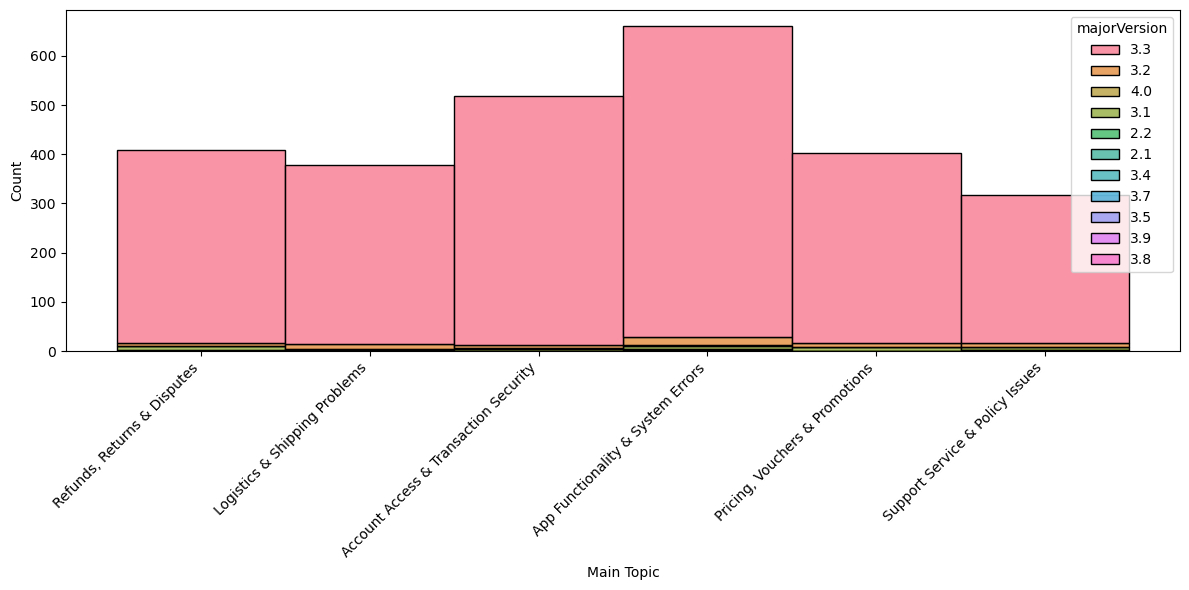

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=negative_info, x="Main Topic", hue="majorVersion", multiple="stack")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

The majority of issues in all categories are concentrated in version 3.3, which dominates across topics such as App Functionality & System Errors and Account Access & Transaction Security. Other versions contribute only marginally, suggesting that most user concerns are tied to this specific release.

#### Main Topic VS Month

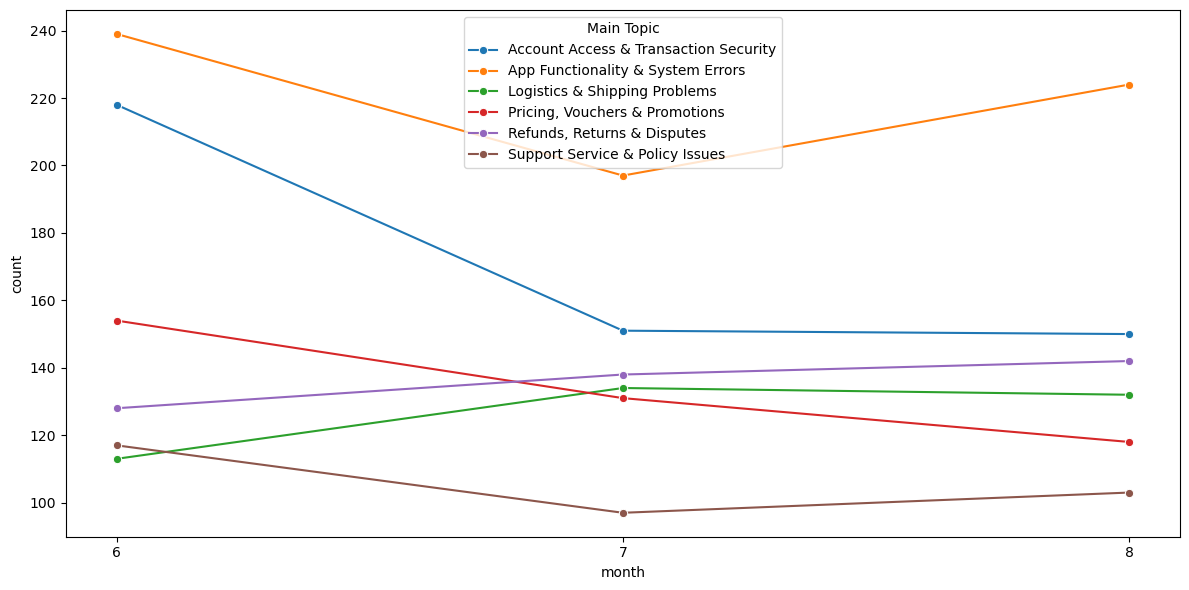

In [ ]:
plt.figure(figsize=(12, 6))
plot_data = negative_info.groupby(["month", "Main Topic"]).size().reset_index(name="count")

sns.lineplot(data=plot_data, x="month", y="count", hue="Main Topic", marker="o")
plt.tight_layout()
plt.show()

App Functionality & System Errors and Account Access & Transaction Security consistently dominate, though both decline in July before stabilizing. Refunds, Returns & Disputes and Logistics & Shipping Problems show a gradual increase, while Pricing, Vouchers & Promotions steadily decreases. Support Service & Policy Issues remains the lowest but shows slight growth in August.

## Positive Topic

### Topic Modelling

In [ ]:
positive_topic = topic(11)
positive_info = positive_topic.fit_transform(positive)
positive_info = positive_topic.get_topic_info()
positive_info.to_excel('tokped_positive.xlsx')
positive_info

2025-09-02 14:29:05,253 - BERTopic - Embedding - Transforming documents to embeddings.
100% 1188/1188 [00:04<00:00, 265.45it/s]
2025-09-02 14:29:09,735 - BERTopic - Embedding - Completed ✓
2025-09-02 14:29:09,735 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-09-02 14:29:11,229 - BERTopic - Dimensionality - Completed ✓
2025-09-02 14:29:11,230 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-09-02 14:29:11,235 - BERTopic - Cluster - Completed ✓
2025-09-02 14:29:11,236 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-09-02 14:29:12,411 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,0,185,0_like_stuff_im_use,"[like, stuff, im, use, product, make, shop, he...",[im satisfied tokopedia automatically cancelle...
1,1,158,1_like_dont_make_use,"[like, dont, make, use, product, tokped, thank...",[actually ive subscribing long time usually go...
2,2,150,2_stuff_product_helpful_thank,"[stuff, product, helpful, thank, toped, like, ...","[good helpful, good helpful, really good descr..."
3,3,116,3_dont_product_im_toped,"[dont, product, im, toped, fast, make, time, s...",[advice expedition fastest tokopedia repair do...
4,4,101,4_stuff_like_tokped_make,"[stuff, like, tokped, make, use, thank, fast, ...","[good sale, description good less detailed exa..."
5,5,99,5_tokped_stuff_im_product,"[tokped, stuff, im, product, shop, helpful, ma...",[return good must facilitated unloading good s...
6,6,99,6_fast_make_toped_shop,"[fast, make, toped, shop, like, product, helpf...",[far good fast delivery good according ad tikt...
7,7,84,7_make_like_use_product,"[make, like, use, product, tokped, helpful, im...",[good app yh steady cant get apdete tiktok app...
8,8,80,8_fast_okay_thank_time,"[fast, okay, thank, time, toped, product, dont...","[pretty good still going smoothly, good fast, ..."
9,9,71,9_use_fast_product_make,"[use, fast, product, make, stuff, helpful, lik...","[bgs easy use, convenient use, easy use practi..."


### Main Topic Intepretation

In [ ]:
positive_topic.set_topic_labels({
    0: "Satisfied with good online shopping.",
    1: "Good app functionality and refunds.",
    2: "Good products and fast delivery.",
    3: "Apps easy use, helpful, good.",
    4: "Fast, reliable, and convenient service.",
    5: "Good value and competitive pricing.",
    6: "Competitive price, good quality shopping.",
    7: "Good, helpful, and satisfactory experience.",
    8: "Good quality and performance",
    9: "Easy access and product discovery.",
    10: "Good, quick, responsive service."
})

positive_info = positive_topic.get_document_info(positive)
positive_info["Main Topic"] = positive_info["CustomName"]
positive_info = positive_info[["Document", "Main Topic"]]
positive_info

,Document,Main Topic
0,tokopedia getting weirder there store thats ar...,Satisfied with good online shopping.
1,price good already price placed good also pric...,"Apps easy use, helpful, good."
2,please dont make app lot mistake hide keywords...,Good app functionality and refunds.
3,unfortunately store dont provide jne courier i...,"Apps easy use, helpful, good."
4,advice expedition fastest tokopedia repair don...,"Apps easy use, helpful, good."
...,...,...
1183,amazing pedia shop,Satisfied with good online shopping.
1184,good star prove,Good products and fast delivery.
1185,good help,Good products and fast delivery.
1186,process fast,Good quality and performance


### Main Topic Distribution

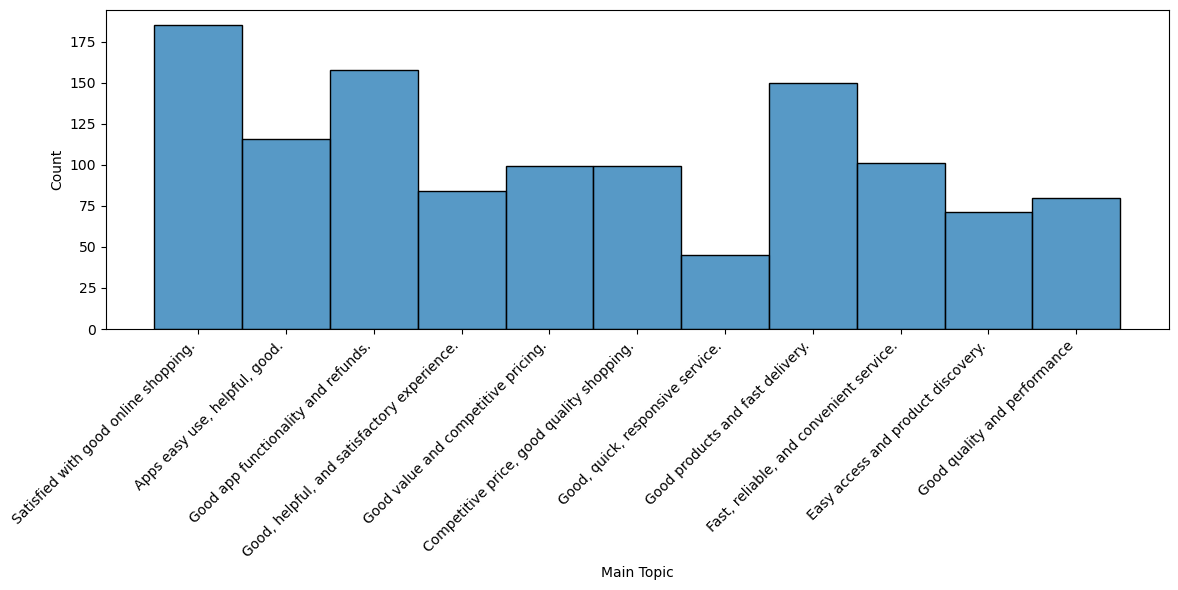

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=positive_info, x="Main Topic")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

The most frequent praises are for good online shopping experiences and easy-to-use apps, followed by app functionality with refunds and fast delivery services. Other notable aspects include competitive pricing, quality products, and responsive support, showing that users value both smooth transactions and reliable services.

---

# 🎯 Conclusion